<a href="https://colab.research.google.com/github/harry-at-cogwrite/describe_data/blob/main/data_exploration_nb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.display import display, HTML
# jason wang's first notebook to describe the rubirc score distributions
import os
import shutil
import json
import numpy as np
import pandas as pd
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import torch
sns.set_style('darkgrid')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
random.seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
baseLoc = "/content/drive/MyDrive/ColabNotebooks"
# dataLoc = "flat_groupALL_rubric_8_scores_final_writing_8018.xlsx"

In [13]:
# dataLoc = "aa_project_02_rubric_scores/flat_groupALL_rubric_8_scores_final_writing_8018.xlsx"
dataLoc = "/flat_groupALL_rubric_8_scores_final_writing_8018.xlsx"

In [14]:
df = pd.read_excel(baseLoc+dataLoc)

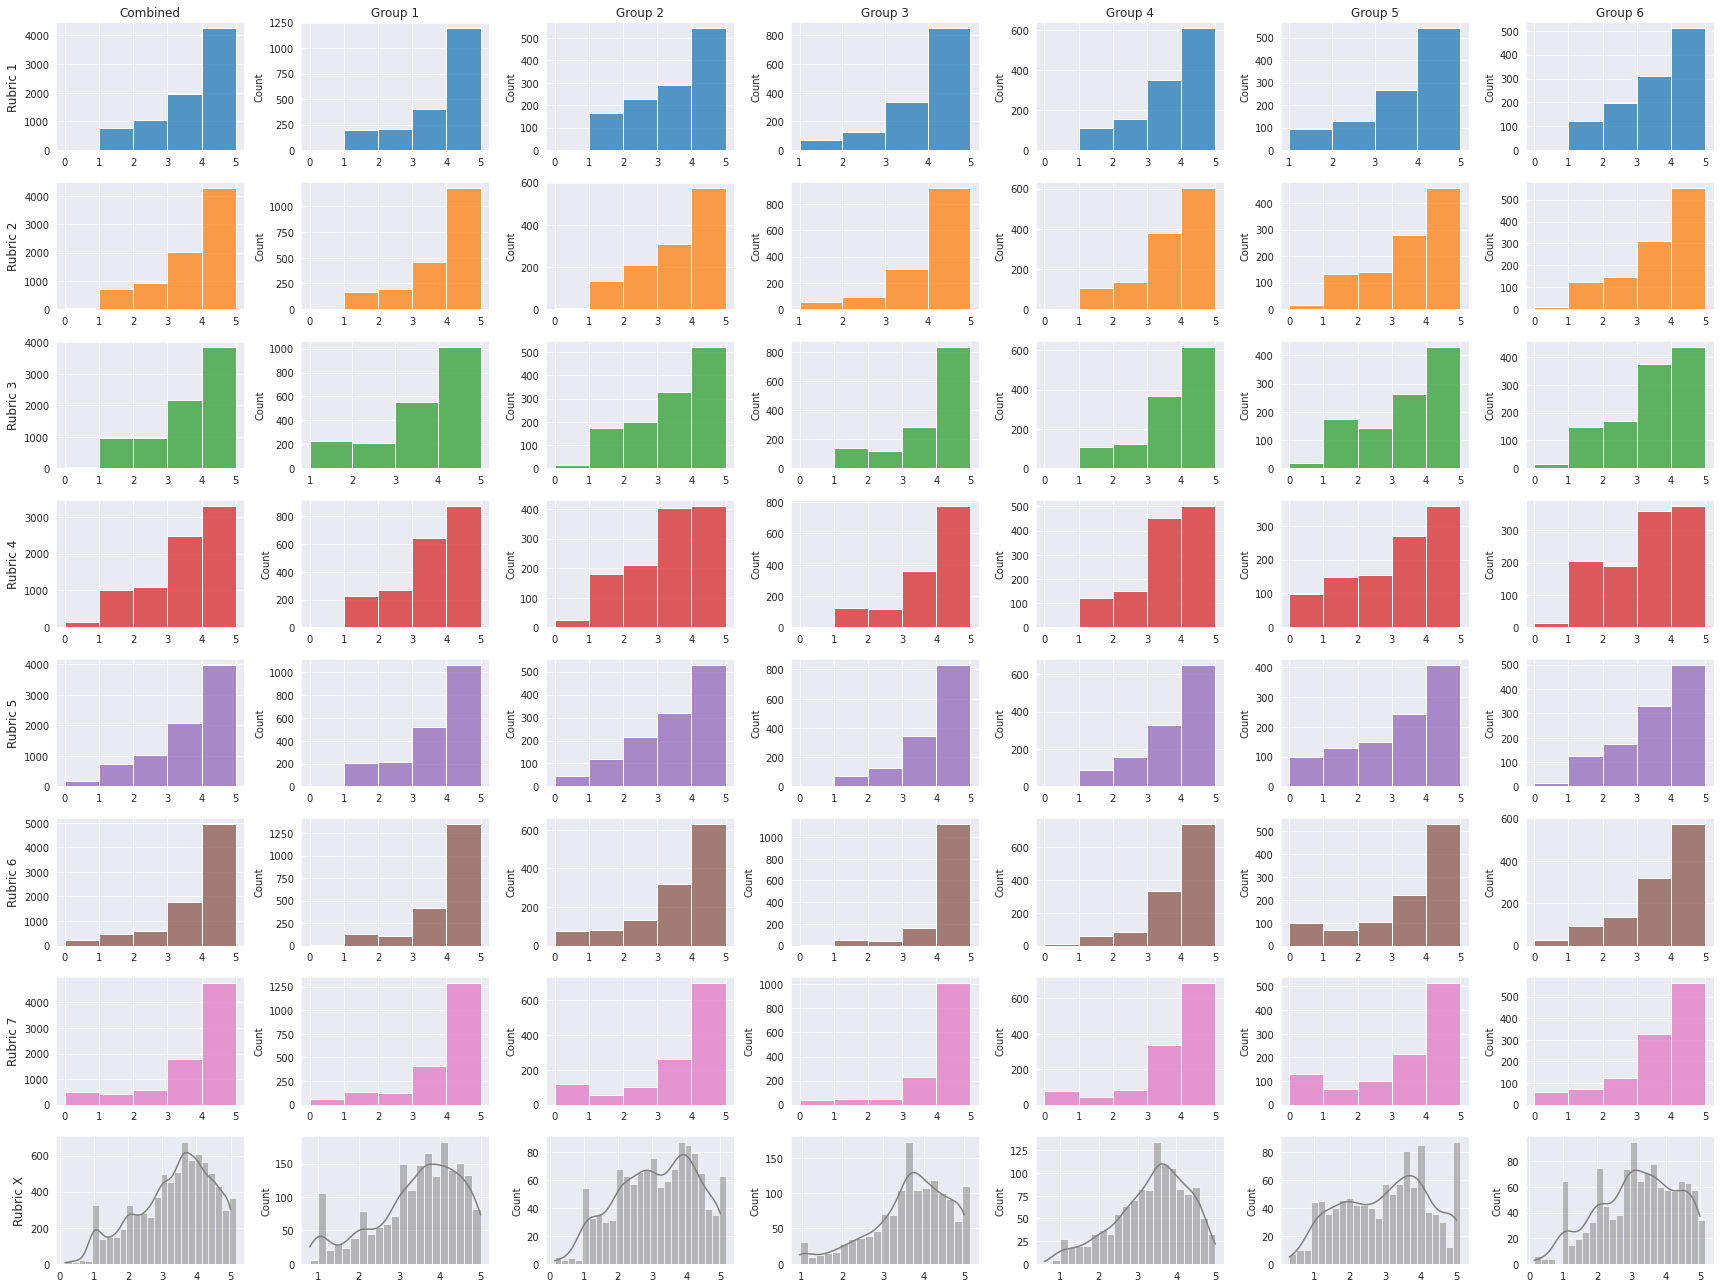

In [15]:
fig, axes = plt.subplots(8, 7,figsize=(24,18))
colors = sns.color_palette("tab10",8)
for group in range(7):
  data = df[df["grp_id"]==group] if group>0 else df
  for rubric in range(7):
    sns.histplot(x="ai_score"+str(rubric+1),data=data,binwidth=1,color=colors[rubric],ax=axes[rubric,group])
    axes[rubric,group].set_xlabel("")
  sns.histplot(x="ai_scoreX",data=data,binwidth=0.2,color=colors[-1],ax=axes[7,group],kde=True)
  axes[7,group].set_xlabel("")
for i,ax in enumerate(axes[0]):
    ax.set_title("Group %d" % (i))
axes[0,0].set_title("Combined")
for i,ax in enumerate(axes[:,0]):
    ax.set_ylabel("Rubric %d" % (i+1), size='large')
axes[-1,0].set_ylabel("Rubric X",size='large')
fig.tight_layout()

In [16]:
print("All Groups")
display(df[["ai_score1", "ai_score2","ai_score3","ai_score4","ai_score5","ai_score6","ai_score7","ai_scoreX"]].describe())
for group in range(1,7):
  print("Group",group)
  display(df[df["grp_id"]==group][["ai_score1", "ai_score2","ai_score3","ai_score4","ai_score5","ai_score6","ai_score7","ai_scoreX"]].describe())

All Groups


,ai_score1,ai_score2,ai_score3,ai_score4,ai_score5,ai_score6,ai_score7,ai_scoreX
count,8018.000000,8018.000000,8018.000000,8018.000000,8018.000000,8018.000000,8018.000000,8018.000000
mean,3.470816,3.450112,3.300698,3.116488,3.339112,3.662385,3.529808,3.343458
std,1.274072,1.228053,1.281508,1.277276,1.317547,1.301359,1.419293,1.101402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.600000
50%,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.550000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.200000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Group 1


,ai_score1,ai_score2,ai_score3,ai_score4,ai_score5,ai_score6,ai_score7,ai_scoreX
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,3.631029,3.579314,3.403282,3.235704,3.455495,3.829438,3.691198,3.470288
std,1.328266,1.218044,1.260565,1.205765,1.262306,1.164247,1.324329,1.074114
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.900000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.650000
75%,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.300000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Group 2


,ai_score1,ai_score2,ai_score3,ai_score4,ai_score5,ai_score6,ai_score7,ai_scoreX
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000
mean,3.228896,3.256494,3.123377,2.917208,3.136364,3.357955,3.390422,3.139610
std,1.369107,1.265344,1.317028,1.266822,1.364840,1.438459,1.538883,1.151645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.250000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.200000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.050000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Group 3


,ai_score1,ai_score2,ai_score3,ai_score4,ai_score5,ai_score6,ai_score7,ai_scoreX
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,3.730239,3.814358,3.577230,3.496012,3.667875,4.177665,3.946338,3.678789
std,1.140891,1.053185,1.241086,1.175687,1.146044,1.038264,1.227417,0.956348
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.200000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.800000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.400000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Group 4


,ai_score1,ai_score2,ai_score3,ai_score4,ai_score5,ai_score6,ai_score7,ai_scoreX
count,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000,1225.000000
mean,3.395918,3.353469,3.399184,3.190204,3.444082,3.706122,3.511837,3.384531
std,1.206931,1.122391,1.161684,1.105794,1.158381,1.129739,1.376768,0.939823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.800000
50%,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.550000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.100000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Group 5


,ai_score1,ai_score2,ai_score3,ai_score4,ai_score5,ai_score6,ai_score7,ai_scoreX
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,3.415938,3.141885,3.041788,2.756074,2.886297,3.201166,3.094266,3.022498
std,1.193358,1.278863,1.358502,1.506075,1.557490,1.533465,1.613976,1.224029
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000
25%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.150000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Group 6


,ai_score1,ai_score2,ai_score3,ai_score4,ai_score5,ai_score6,ai_score7,ai_scoreX
count,1142.00000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,3.26620,3.373030,3.105079,2.908932,3.251313,3.443082,3.304729,3.180254
std,1.27164,1.326296,1.282044,1.318156,1.328865,1.333122,1.345605,1.152276
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000
25%,2.00000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.350000
50%,3.00000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.250000
75%,4.00000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.050000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
